<a href="https://colab.research.google.com/github/Bhavya171/Train-Delay-Predictor/blob/main/Train_Delay_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Delay Predictor


## Data Cleaning

In [1]:
import pandas as pd

df = pd.read_csv('/content/train_delay_data.csv')


In [2]:
df

,station,scheduled_time,weather,day_of_week,is_holiday,is_delayed
0,Huda City Centre,01-05-2024 14:00,Sunny,Wednesday,0,0
1,Rajiv Chowk,01-05-2024 10:30,Sunny,Thursday,0,0
2,Dwarka Sec-21,01-05-2024 15:45,Foggy,Saturday,0,1
3,Noida City Centre,01-05-2024 17:00,Cloudy,Tuesday,0,0
4,Dwarka Sec-21,01-05-2024 16:00,Foggy,Monday,1,1
...,...,...,...,...,...,...
495,Central Secretariat,01-05-2024 19:00,Foggy,Saturday,0,1
496,Dwarka Sec-21,01-05-2024 19:30,Foggy,Monday,0,1
497,Kashmere Gate,01-05-2024 09:30,Foggy,Friday,0,1
498,Dwarka Sec-21,01-05-2024 10:45,Foggy,Tuesday,1,1


In [3]:
df

,station,scheduled_time,weather,day_of_week,is_holiday,is_delayed
0,Huda City Centre,01-05-2024 14:00,Sunny,Wednesday,0,0
1,Rajiv Chowk,01-05-2024 10:30,Sunny,Thursday,0,0
2,Dwarka Sec-21,01-05-2024 15:45,Foggy,Saturday,0,1
3,Noida City Centre,01-05-2024 17:00,Cloudy,Tuesday,0,0
4,Dwarka Sec-21,01-05-2024 16:00,Foggy,Monday,1,1
...,...,...,...,...,...,...
495,Central Secretariat,01-05-2024 19:00,Foggy,Saturday,0,1
496,Dwarka Sec-21,01-05-2024 19:30,Foggy,Monday,0,1
497,Kashmere Gate,01-05-2024 09:30,Foggy,Friday,0,1
498,Dwarka Sec-21,01-05-2024 10:45,Foggy,Tuesday,1,1


In [4]:
df['scheduled_time'] = df['scheduled_time'].str.replace(":","").str.split(" ")
print(df['scheduled_time'])


0      [01-05-2024, 1400]
1      [01-05-2024, 1030]
2      [01-05-2024, 1545]
3      [01-05-2024, 1700]
4      [01-05-2024, 1600]
              ...        
495    [01-05-2024, 1900]
496    [01-05-2024, 1930]
497    [01-05-2024, 0930]
498    [01-05-2024, 1045]
499    [01-05-2024, 1100]
Name: scheduled_time, Length: 500, dtype: object


In [5]:
for i in range(500):
  df['scheduled_time'][i] = df['scheduled_time'][i][1]
print(df['scheduled_time'])

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['scheduled_time'][i] = df['scheduled_time'][i][1]
<ipython-input-5-a09165dbe416>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scheduled_time'][i] = df['scheduled_time'][i][1]
<ipython-input-5-a09165dbe416>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy

0      1400
1      1030
2      1545
3      1700
4      1600
       ... 
495    1900
496    1930
497    0930
498    1045
499    1100
Name: scheduled_time, Length: 500, dtype: object


In [6]:
df['scheduled_time'] = df['scheduled_time'].astype(float)
df.dtypes

,0
station,object
scheduled_time,float64
weather,object
day_of_week,object
is_holiday,int64
is_delayed,int64


In [7]:
day_mapping = {
    'Monday' :  1,
    'Tuesday' :  2,
    'Wednesday' :  3,
    'Thursday' :  4,
    'Friday' :  5,
    'Saturday' :  6,
    'Sunday' :  7,
}
df['day_of_week'] = df['day_of_week'].map(day_mapping)

weather_mapping = {
    'Sunny': 1,
    'Cloudy': 2,
    'Rainy': 3,
    'Foggy': 4
}
df['weather'] = df['weather'].map(weather_mapping)

station_mapping = {
    'Rajiv Chowk' : 1,
    'Kashmere Gate' : 2,
    'Huda City Centre' : 3,
    'Noida City Centre' : 4,
    'Dwarka Sec-21' : 5,
    'Central Secretariat' : 6
}
df['station'] = df['station'].map(station_mapping)

df.dtypes

,0
station,int64
scheduled_time,float64
weather,int64
day_of_week,int64
is_holiday,int64
is_delayed,int64


## Data Preprocessing for Model

In [8]:
# Define features (X)
X = df.drop('is_delayed', axis=1)

# Define the target variable (y)
y = df['is_delayed']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Building Model using ANN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
                      Dense(10, activation='relu', input_shape=(5,)),
                      Dense(10, activation='relu'),
                      Dense(1, activation='sigmoid')
                  ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the model


In [11]:
history = model.fit(X_train, y_train, epochs=80, validation_split = 0.1,batch_size = 50)

Epoch 1/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5419 - loss: 0.6340 - val_accuracy: 0.5250 - val_loss: 0.6331
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5710 - loss: 0.5880 - val_accuracy: 0.5250 - val_loss: 0.6166
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5458 - loss: 0.6009 - val_accuracy: 0.5750 - val_loss: 0.6007
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5961 - loss: 0.5658 - val_accuracy: 0.5750 - val_loss: 0.5863
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5687 - loss: 0.5806 - val_accuracy: 0.6000 - val_loss: 0.5728
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6598 - loss: 0.5239 - val_accuracy: 0.6000 - val_loss: 0.5596
Epoch 7/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6755 - loss: 0.5332 - val_accuracy: 0.6250 - val_loss: 0.5463
Epoch 8/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7080 - loss: 0.5262 - val_accuracy: 0.6750 - val_loss: 0.5331


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9262 - loss: 0.2728
Test accuracy: 0.9300


### Testing the Model

In [13]:
# Example: Predict on the first few rows of the test data
predictions = model.predict(X_test[:5])

# The output of the predict method for a binary classification model
# is typically probabilities. You can convert these to class labels
# by setting a threshold (e.g., 0.5).
predicted_classes = (predictions > 0.5).astype("int32")

print("Predictions:")
print(predictions)
print("\nPredicted classes (0 for no delay, 1 for delay):")
print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predictions:
[[0.08348735]
 [0.09996112]
 [0.99992156]
 [0.3321837 ]
 [0.21897505]]

Predicted classes (0 for no delay, 1 for delay):
[[0]
 [0]
 [1]
 [0]
 [0]]


### Checking the Prediction on a Custom Input

In [14]:
custom_data = {
    'station': ['Rajiv Chowk'],
    'scheduled_time': ['2024-05-01 07:00'],
    'weather': ['Rainy'],
    'day_of_week': ['Sunday'],
    'is_holiday': [1]
}

custom_df = pd.DataFrame(custom_data)

custom_df['scheduled_time'] = custom_df['scheduled_time'].str.replace(":","").str.split(" ").str[1].astype(float)

custom_df['day_of_week'] = custom_df['day_of_week'].map(day_mapping)
custom_df['weather'] = custom_df['weather'].map(weather_mapping)
custom_df['station'] = custom_df['station'].map(station_mapping)

custom_input_scaled = scaler.transform(custom_df)

custom_prediction = model.predict(custom_input_scaled)
custom_predicted_class = (custom_prediction > 0.5).astype("int32")

print("Custom Input Prediction:")
print(custom_prediction)
print("\nCustom Input Predicted class (0 for no delay, 1 for delay):")
print(custom_predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Custom Input Prediction:
[[0.6964283]]

Custom Input Predicted class (0 for no delay, 1 for delay):
[[1]]


## Basic Data Analysis

### Train delays on respective days

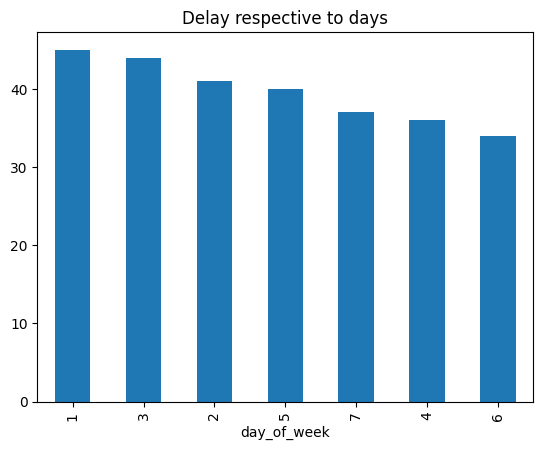

In [16]:
import matplotlib.pyplot as plt

df[df['is_delayed'] == 1]['day_of_week'].value_counts().plot(kind = 'bar')
plt.title("Delay respective to days")
plt.show()

Conclusion: As we can see the most number of delays occur on a Monday and the least number of delays occur on a Saturday

### Train delays respective to stations

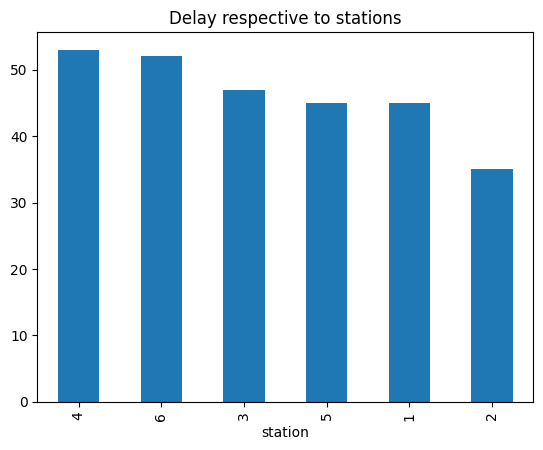

In [17]:
df[df['is_delayed'] == 1]['station'].value_counts().plot(kind = 'bar')
plt.title("Delay respective to stations")
plt.show()

Conclusion: Delay occurs at noida City Centre the maximum number of times and at Kashmere gate the minimum number of times

### Delay depends upon the weather

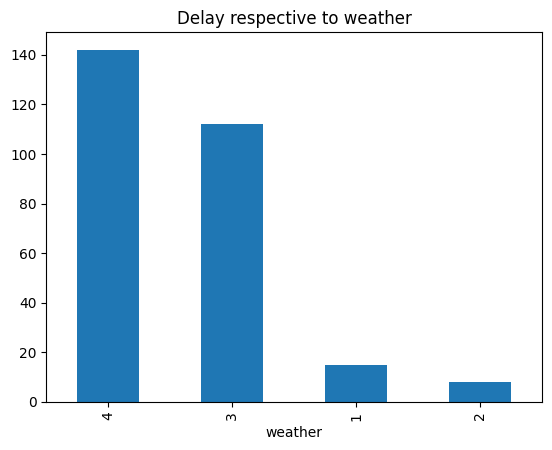

In [19]:
df[df['is_delayed'] == 1]['weather'].value_counts().plot(kind = 'bar')
plt.title("Delay respective to weather")
plt.show()

Conclusion: Most delays occur on a foggy day and least occur on a cloudy day